<a id='description'></a>

# Описание проекта

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

### Содержание исследования:

* ### [Описание проекта](#description)
* ### [Ход проекта](#body)
    * #### [Импортирование библиотек и знакомство с данными](#import)
    * #### [Предобработка данных](#preprocessing)
        * ##### [Работа с пропущенными значениями](#miss)
        * ##### [Работа с типом данных](#type)
        * ##### [Работа с дубликатами](#duplicates)
        * ##### [Работа с леммами](#lemmas)
        * ##### [Работа с категориями](#categories)
    * #### [Ответы на вопросы](#questions)
        * ##### [Есть ли зависимость между наличием детей и возвратом кредита в срок?](#question_1)
        * ##### [Есть ли зависимость между семейным положением и возвратом кредита в срок?](#question_2)
        * ##### [Есть ли зависимость между уровнем дохода и возвратом кредита в срок?](#question_3)
        * ##### [Как разные цели кредита влияют на его возврат в срок?](#question_4)
* ### [Общий вывод](#ending)

<a id='body'></a>

# Ход проекта

<a id='import'></a>

## Импортирование библиотек и знакомство с данными

In [2]:
#pip install pymystem3

In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pymystem3 import Mystem
%matplotlib inline

In [13]:
# убираем символ комментария с нужного пути файла и запускаем скрипт

#data = pd.read_csv('/datasets/data.csv')
data = pd.read_csv('data.csv')

In [14]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [6]:
data.tail()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля
21524,2,-1984.507589,40,среднее,1,женат / замужем,0,F,сотрудник,0,82047.418899,на покупку автомобиля


<a id='preprocessing'></a>

## Предобработка данных

<a id='miss'></a>

### Работа с пропущенными значениями

#### Поиск пропущенных значений

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [8]:
missing_ratio = round(data.isnull().sum() / data.shape[0], 3).sort_values(ascending=False)
print(f'Доля пропущенных значений по столбцам:\n{missing_ratio}')

Доля пропущенных значений по столбцам:
total_income        0.101
days_employed       0.101
purpose             0.000
debt                0.000
income_type         0.000
gender              0.000
family_status_id    0.000
family_status       0.000
education_id        0.000
education           0.000
dob_years           0.000
children            0.000
dtype: float64


In [7]:
# посмотрим на строки, содержащие пропуски
data[data['days_employed'].isnull()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости


❓Гипотеза: пропуски в атрибуте days_employed и total_income содержатся в одних и тех же строках датасета (т.к. количество пропущенных строк равно, а признаки явно имеют не нулевую естественную корреляцию)

In [8]:
(data['days_employed'].isnull() == data['total_income'].isnull()).value_counts()

True    21525
dtype: int64

❗️Гипотеза подтверждена

#### Заполнение пропущенных значений

In [9]:
# посмотрим на основные статистические метрики обоих столбцов, имеющих пропуски
data[['days_employed', 'total_income']].describe()

,days_employed,total_income
count,19351.000000,1.935100e+04
mean,63046.497661,1.674223e+05
std,140827.311974,1.029716e+05
min,-18388.949901,2.066726e+04
25%,-2747.423625,1.030532e+05
50%,-1203.369529,1.450179e+05
75%,-291.095954,2.034351e+05
max,401755.400475,2.265604e+06


##### Работа с атрибутом days_employed

❓В столбце days_employed содержится очевидно большое количество выбросов, начиная от отрицательных значений и заканчивая стажем в 1000+ лет. Изучим распределение этого признака более детально, чтобы сделать выводы о пригодности использования данного атрибута в рамках текущего исследования

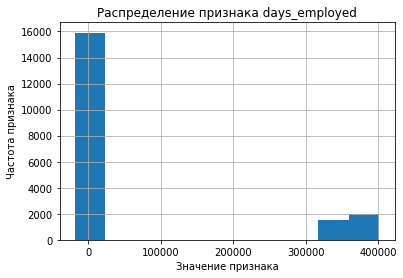

In [10]:
data['days_employed'].hist()
plt.title('Распределение признака days_employed')
plt.xlabel('Значение признака')
plt.ylabel('Частота признака')
plt.show()

In [11]:
# Посчитаем долю строк, котоорые явно содержат выбросы
negative_days = data['days_employed'][data['days_employed'] < 0].count()
large_days = data['days_employed'][data['days_employed'] > 50000].count()
total_bad_days = negative_days + large_days
total_days = data['days_employed'].count()
bad_days_ration = total_bad_days / total_days

print(f'Количество плохих строк: {total_bad_days};'
      + '\n' +
      f'Всего строк: {total_days};' 
      + '\n' + 
      f'Доля плохих строк в выборке: {bad_days_ration}.')

Количество плохих строк: 19351;
Всего строк: 19351;
Доля плохих строк в выборке: 1.0.


❗️Как можно заметить, реалистичных данных в столбце days_employed попросту нет. В связи с этим обстоятельством, единственным разумным решением будет исключить данный столбец из исследовательского датасета и сообщить специалисту подготовки данных о проблеммах при выгрузке.

In [12]:
# сохраним копию исходного массива в переменную full_data и удалим ненужный столбец из исследовательского датасета
full_data = data
data = data.drop(['days_employed'], axis=1)

##### Работа с атрибутом total_income

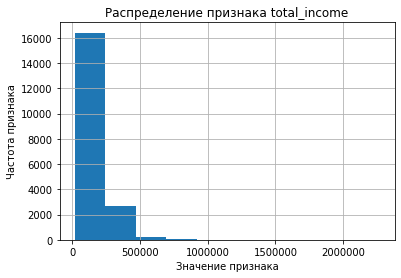

In [13]:
data['total_income'].hist()
plt.title('Распределение признака total_income')
plt.xlabel('Значение признака')
plt.ylabel('Частота признака')
plt.show()

❗️Так как в данном атрибуте так же имеются выбросы, заменить пропуски банальным средним арифметическим не представляется рациональным. 

In [14]:
# Изучим зависимость пропусков в статье доходов от типа занятости
miss_by_type = data['income_type'][data['total_income'].isnull()].value_counts()
miss_by_type

сотрудник          1105
компаньон           508
пенсионер           413
госслужащий         147
предприниматель       1
Name: income_type, dtype: int64

In [15]:
stat_by_type = data[['income_type', 'total_income']].groupby('income_type').agg({'total_income': ['count', 'median']})
stat_by_type

total_income               
                       count         median
income_type                                
безработный                2  131339.751676
в декрете                  1   53829.130729
госслужащий             1312  150447.935283
компаньон               4577  172357.950966
пенсионер               3443  118514.486412
предприниматель            1  499163.144947
сотрудник              10014  142594.396847
студент                    1   98201.625314

❗️Как можно заметить, в каждой категории типов занятости, содержащих пропуски, общее количество "плохих" строк составляет около 10% от выборки => можно заполнить пропуски медианой из каждой категории

❗️❗️Исключением является тип занятости "предприниматель", общее число "чистых" данных которого составляет 1 строку. Очевидно, данных для заполнения пропусков недостаточно (да и в целом для какого-либо анализа), поэтому строку, содержащую пропущенное значение можно удалить

In [16]:
def filling_income_by_type(types):
    '''Заполняем пропуски в столбце дохода в зависимости от типа дохода'''
    for typ in types:
        if typ != 'предприниматель':
            median = data[data['income_type'] == typ]['total_income'].median()
            data.loc[data['income_type'] == typ, 'total_income'] = data.loc[data['income_type'] == typ, 'total_income'].fillna(value=median)

In [17]:
filling_income_by_type(miss_by_type.index.to_list())

In [18]:
data.dropna(subset=['total_income'], inplace=True)

In [19]:
data.isnull().sum()

children            0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

❗️Задача решена, пропусков в данных не осталось

In [20]:
data

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...
21520,1,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


#### Выводы

1. Были обнаружены пропущенные значения в столбцах days_employed и total_income. 
2. В связи с тем, что пропуски в обоих столбцах были в одних и тех же строках, есть основания полагать, что имеет место ошибка в процессе выгрузки данных (техническая ошибка).
3. Пропуски в столбце days_employed не предоставилось возможных заполнить в связи с плохим качеством данных. Итоговое решение по данному признаку: исключить его из анализа. Пропуски в столбце total_income были заполнены медианными значения по каждому income_type (так как этот столбцец оказывает влияние на total_income). Медиана была выбрана для минимизации влияния выбросов, имеющихся в данных в не малом объеме.

<a id='type'></a>

### Работа с типом данных

In [21]:
data.dtypes

children              int64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object

In [22]:
# изменим флоат на инт
s = data['total_income'].round(0)
data['total_income'] = pd.to_numeric(s, errors='coerce', downcast='integer')

In [23]:
data['total_income'].dtype

dtype('int32')

#### Выводы

В качестве метода для округления был выбрал встроенный метод pandas to_numeric с аргументом downcast='integer', на вход которому был подан Series с арифметически округленными значениями data['total_income']

<a id='duplicates'></a>

### Работа с дубликатами

In [24]:
object_columns = data.dtypes[data.dtypes == 'object'].index

In [25]:
# приведем все строковые признаки к одному регистру
for column in object_columns:
    data[column] = data[column].str.lower()

In [26]:
data[data.duplicated()].head(5)

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2849,0,41,среднее,1,женат / замужем,0,f,сотрудник,0,142594,покупка жилья для семьи
3290,0,58,среднее,1,гражданский брак,1,f,пенсионер,0,118514,сыграть свадьбу
4182,1,34,высшее,0,гражданский брак,1,f,сотрудник,0,142594,свадьба
4851,0,60,среднее,1,гражданский брак,1,f,пенсионер,0,118514,свадьба
5557,0,58,среднее,1,гражданский брак,1,f,пенсионер,0,118514,сыграть свадьбу


In [27]:
# удалим дубликаты
data = data.drop_duplicates().reset_index(drop = True)

In [28]:
f'Количество дубликатов в датасете: {data.duplicated().sum()} дубликатов'

'Количество дубликатов в датасете: 0 дубликатов'

#### Выводы

1. Первым делом привел все строковые типы данных к нижнему регистру, далее встрооенным методом duplicated() выявил дубликаты и удалил их
2. Из возможных причин появления дубликатов: человеческий фактор (со стороны клиента, если заявки подаются онлайн (двойная заявка); со стороны оператора в случае, если заявки подаются оффлайн/по телефону)

<a id='lemmas'></a>

### Работа с леммами

In [29]:
m = Mystem()
textes = data['purpose']
lemmatize_textes = []
for text in textes:
    lemmas = ''.join(m.lemmatize(text))
    lemmatize_textes.append(lemmas.replace("\n", ""))
data['purpose'] = lemmatize_textes

#### Выводы

Для каждой строки выделял леммы слов, склеивал их в предложение и удалял символ переноса строки. После составления списка лемматизированных строк, заменил исходный столбец на список

<a id='categories'></a>

### Работа с категориями

In [30]:
out_of = []
def purpose_cat(purpose):
    global out_of
    if 'коммерческий недвижимость' in purpose:
        return 'коммерческая недвижимость'
    elif 'строительство' in purpose:
        return 'строительство'
    elif 'ремонт жилье' in purpose or 'операция со свой недвижимость' in purpose:
        return 'ремонт'
    elif 'жилье' in purpose or 'жилой недвижимость' in purpose or 'недвижимость' in purpose:
        return 'недвижимость'
    elif 'автомобиль' in purpose:
        return 'автомобиль'
    elif 'дополнительный образование' in purpose:
        return 'дополнительное образование'
    elif 'образование' in purpose:
        return 'образование'
    elif 'свадьба' in purpose:
        return 'свадьба'
    else:
        out_of.append(purpose)
        return 'другое'

In [31]:
data['purpose_category'] = data['purpose'].apply(purpose_cat)

In [32]:
data['purpose_category'].value_counts()

недвижимость                  6387
автомобиль                    4306
образование                   3107
свадьба                       2324
строительство                 1878
коммерческая недвижимость     1311
ремонт                        1234
дополнительное образование     906
Name: purpose_category, dtype: int64

In [33]:
data.head()

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category
0,1,42,высшее,0,женат / замужем,0,f,сотрудник,0,253876,покупка жилье,недвижимость
1,1,36,среднее,1,женат / замужем,0,f,сотрудник,0,112080,приобретение автомобиль,автомобиль
2,0,33,среднее,1,женат / замужем,0,m,сотрудник,0,145886,покупка жилье,недвижимость
3,3,32,среднее,1,женат / замужем,0,m,сотрудник,0,267629,дополнительный образование,дополнительное образование
4,0,53,среднее,1,гражданский брак,1,f,пенсионер,0,158616,сыграть свадьба,свадьба


In [34]:
f'Количество и значения уникальных записей из категории другое: {pd.Series(out_of).value_counts()}'

'Количество и значения уникальных записей из категории другое: Series([], dtype: int64)'

#### Выводы

В качестве словарей были взяты следующие позиции:
 - недвижимость
 - строительство
 - коммерческая недвижимость
 - ремонт
 - автомобиль
 - образование
 - дополнительное образование
 - свадьба
 
При выборе исходил из принципа максимальной категоризации при сохранении ценности для бизнеса (к примеру, пункты "недвижимость", "строительство", "коммерческая недвижимость", "ремонт" разделены на четыре категории, так как процент при кредитовании на покупку/строительство/ремонт жилой/коммерческой недвижимости может быть разным + "образование" и "дополнительное образование" разделены в связи с наличием специальных тарифов на получение **высшего** образования)

<a id='questions'></a>

## Ответы на вопросы

<a id='question_1'></a>

### Есть ли зависимость между наличием детей и возвратом кредита в срок?

#### Предобработка признака children

❓В столбце children обнаружились аномальные значения, которые нужно исследовать и ликвидировать

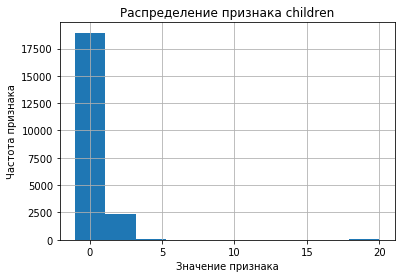

In [35]:
data['children'].hist()
plt.title('Распределение признака children')
plt.xlabel('Значение признака')
plt.ylabel('Частота признака')
plt.show()

In [36]:
data['children'].value_counts()

 0     14090
 1      4808
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

❓20 детей перебор даже для Артемия Лебедева. Скорее всего имел место быть человеческий фактор, оператор заполнял столбец через numpad и мисскликал в ноль вместо стрелки вправо (переход к заполнению следующего признака в бд).
\
\
Что касается значений -1, мисскликнуть в данном случае сложно, но несмотря на это, кажется разумным просто заменить эти значения на 1. Так как соотношение -1 к 1 составляет около 1%, объединение данных групп в любом случае не окажет эффекта и итоговые выводы

In [37]:
data['children'] = data['children'].replace(20, 2)
data['children'] = data['children'].replace(-1, 2)

In [38]:
data['children'].value_counts()

0    14090
1     4808
2     2175
3      330
4       41
5        9
Name: children, dtype: int64

❗️Теперь данные покрасивше, можно приступать к ответу на вопрос

In [39]:
task1_pivot = data.pivot_table(index='children', 
                               values='debt', 
                               aggfunc={'debt': ['count', 'sum']}
                              )
task1_pivot.columns = ['total_person', 'total_debtors']
task1_pivot['debtors_ratio'] =  task1_pivot['total_debtors'] / task1_pivot['total_person'] * 100

In [40]:
task1_pivot.sort_values(by='debtors_ratio', ascending=False)

,total_person,total_debtors,debtors_ratio
children,,,
4,41,4,9.756098
2,2175,203,9.333333
1,4808,444,9.234609
3,330,27,8.181818
0,14090,1063,7.544358
5,9,0,0.000000


#### Выводы

Да, можно с уверенностью сказать, что **наличие** детей влияет на склонность к формированию просрочек по кредитным обязательствам, однако, если дети все же есть, то независимо от количества детей, в среднем 9% заемщиков будут иметь задолженности (группу с 5 детьми можно не брать во внимание, выборка, очевидно, недостаточна для формирования устойчивых выводов)

<a id='question_2'></a>

### Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [41]:
task2_pivot = data.pivot_table(index='family_status', 
                               values='debt', 
                               aggfunc={'debt': ['count', 'sum']}
                              )
task2_pivot.columns = ['total_person', 'total_debtors']
task2_pivot['debtors_ratio'] =  task2_pivot['total_debtors'] / task2_pivot['total_person'] * 100

In [42]:
task2_pivot.sort_values(by='debtors_ratio', ascending=False)

,total_person,total_debtors,debtors_ratio
family_status,,,
не женат / не замужем,2810,274,9.750890
гражданский брак,4151,388,9.347145
женат / замужем,12338,931,7.545793
в разводе,1195,85,7.112971
вдовец / вдова,959,63,6.569343


#### Выводы

Не женатые и находящиеся в гражданском браке более склонны к формированию кредиторских задолжностей, нежели те, кто вступил/вступал в брачные отношения

<a id='question_3'></a>

### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [43]:
# pd.options.display.float_format ='{:,.3f}'.format

In [44]:
task3_data = data[['total_income', 'debt']].copy()

In [45]:
quantiles = data['total_income'].quantile([.1, .3, .7, .9, 1])


def income_class(income):
    global quantiles
    if income <= quantiles.loc[0.1]:
        return 'нищие'
    elif income <= quantiles.loc[0.3]:
        return 'бедные'
    elif income <= quantiles.loc[0.7]:
        return 'средний класс'
    elif income <= quantiles.loc[0.9]:
        return 'богатые'
    elif income <= quantiles.loc[1]:
        return 'сверхбогатые'

In [46]:
task3_data['income_class'] = task3_data['total_income'].apply(income_class)

In [47]:
task3_data.groupby('income_class').count()

,total_income,debt
income_class,,
бедные,4290,4290
богатые,4290,4290
нищие,2146,2146
сверхбогатые,2146,2146
средний класс,8581,8581


In [48]:
task3_pivot = task3_data.pivot_table(index='income_class', 
                               values='debt', 
                               aggfunc={'debt': ['count', 'sum']}
                              )
task3_pivot.columns = ['total_person', 'total_debtors']
task3_pivot['debtors_ratio'] = task3_pivot['total_debtors'] / task3_pivot['total_person'] * 100

In [49]:
task3_pivot.sort_values(by='debtors_ratio', ascending=False)

,total_person,total_debtors,debtors_ratio
income_class,,,
средний класс,8581,737,8.588743
бедные,4290,366,8.531469
богатые,4290,330,7.692308
нищие,2146,157,7.315937
сверхбогатые,2146,151,7.036347


#### Выводы

Как бы противоречиво это не было, однако, чем дальше уровень дохода человека от медианы выборки, тем ниже его склонность к формированию просрочек

<a id='question_4'></a>

###  Как разные цели кредита влияют на его возврат в срок?

In [50]:
task4_pivot = data.pivot_table(index='purpose_category', 
                               values='debt', 
                               aggfunc={'debt': ['count', 'sum']}
                              )
task4_pivot.columns = ['total_person', 'total_debtors']
task4_pivot['debtors_ratio'] = task4_pivot['total_debtors'] / task4_pivot['total_person'] * 100

In [51]:
task4_pivot.sort_values(by='debtors_ratio', ascending=False)

,total_person,total_debtors,debtors_ratio
purpose_category,,,
дополнительное образование,906,89,9.823400
автомобиль,4306,403,9.359034
образование,3107,281,9.044094
свадьба,2324,186,8.003442
строительство,1878,144,7.667732
коммерческая недвижимость,1311,99,7.551487
недвижимость,6387,454,7.108189
ремонт,1234,85,6.888169


#### Выводы

Смело можно сказать, что увлечение квадратными метрами - забава серьезных людей: взяли кредит - вернут в срок! Чего, однако, не скажешь о людях, привлекающих кредит на дополнительное образование (видимо, осознание бессмысленности и беспощадности семинаров Тони Роббинсона приводит к острому желанию просрочить оплату кредита... стоит делать такой дисклеймер)

<a id='ending'></a>

# Общий вывод

В ходе проделанной работе удалось пройти путь от предобработки данных к формированию практически-важных выводов на основе имеющегося датасета, а так же прийти к глобокому осознанию того, что если ты не женатый представитель среднего класса с 4 детьми и хочешь взять кредит на дополнительное образование, то стоит быть готовым к отказу! \
\
**ОСТОРОЖНО, МЕМ** \
И наоборот, если ты сверхбогатый вдовец, не имеющий детей и хочешь взять кредит на ремонт, то банки готовы будут за тебя подраться! (а я то думал, чего это ВВП ремонт затеял, так это ему кредит на реставрацию аквадискотеки одобрили!)